In [2]:
import pandas as pd
#! pip install matplotlib
import matplotlib.pyplot as plt
#! pip install statsmodels
import statsmodels.api as sm
import numpy as np

In [3]:
# Read the data
df = pd.read_csv("data/the-reddit-climate-change-dataset-comments.csv")

# Sample 1/1000 of the data with a seed of 42
sampled_df = df.sample(frac=0.001, random_state=42)

# Convert 'created_utc' to datetime
sampled_df['created_utc'] = pd.to_datetime(sampled_df['created_utc'], unit='s')

# Extract month from 'created_utc'
sampled_df['month'] = sampled_df['created_utc'].dt.to_period('M')

# Group by month and count the number of posts
posts_per_month = sampled_df.groupby('month').size()

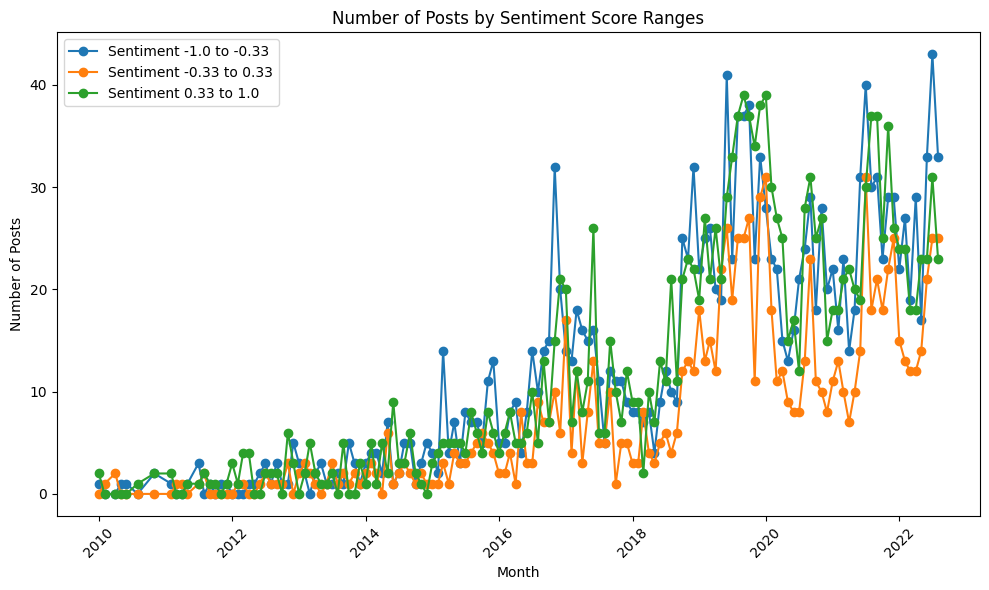

In [11]:
sentiment_ranges = [(-1.0, -0.33), (-0.33, 0.33), (0.33, 1.0)]

# Initialize a dictionary to store counts for each sentiment range
sentiment_counts = {range_: pd.Series(
    0, index=sampled_df['month'].unique()) for range_ in sentiment_ranges}

# Count the number of posts for each sentiment range and each month
for sentiment_range in sentiment_ranges:
    sentiment_start, sentiment_end = sentiment_range
    # Filter DataFrame based on sentiment range
    filtered_df = sampled_df[(sampled_df['sentiment'] >= sentiment_start) & (
        sampled_df['sentiment'] < sentiment_end)]
    # Group by month and count the number of posts
    posts_per_month = filtered_df.groupby('month').size()
    # Update sentiment counts dictionary
    sentiment_counts[sentiment_range] = posts_per_month

# Convert the sentiment counts dictionary to DataFrame
sentiment_counts_df = pd.DataFrame(sentiment_counts)

# Fill missing months with zero counts
sentiment_counts_df.fillna(0, inplace=True)

# Convert Period index to Timestamp objects for plotting
sentiment_counts_df.index = sentiment_counts_df.index.to_timestamp()

# Initialize a figure
plt.figure(figsize=(10, 6))

# Plot each sentiment range as a separate line
for sentiment_range in sentiment_ranges:
    sentiment_start, sentiment_end = sentiment_range
    # Plot the line for this sentiment range
    plt.plot(sentiment_counts_df.index, sentiment_counts_df[sentiment_range],
             label=f'Sentiment {sentiment_start} to {sentiment_end}', marker='o')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Number of Posts by Sentiment Score Ranges')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/h1/p6c3s9rd35j1hz7z1fbdwf8r0000gn/T/ipykernel_2806/2374477551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['created_utc'].dt.month
/var/folders/h1/p6c3s9rd35j1hz7z1fbdwf8r0000gn/T/ipykernel_2806/2374477551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['created_utc'].dt.month
/var/folders/h1/p6c3s9rd35j1hz7z1fbdwf8r0000gn/T/ipykernel_2806/2374477551.py:13: SettingWithCopyWarning: 
A value is trying to be set on 

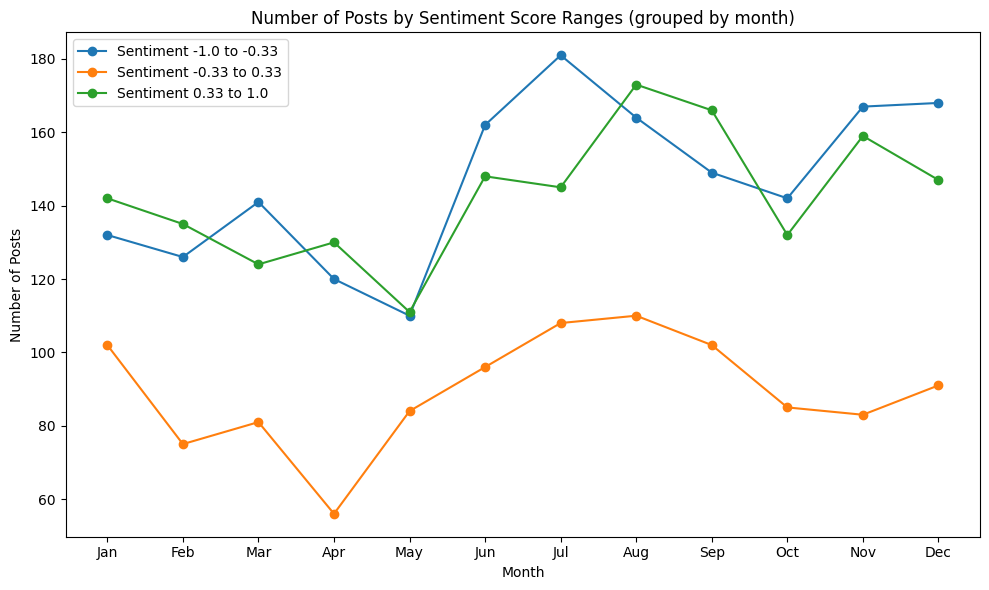

In [13]:
#Same thing without year

sentiment_counts = {range_: pd.Series(
    0, index=range(1, 13)) for range_ in sentiment_ranges}

# Count the number of posts for each sentiment range and each month
for sentiment_range in sentiment_ranges:
    sentiment_start, sentiment_end = sentiment_range
    # Filter DataFrame based on sentiment range
    filtered_df = sampled_df[(sampled_df['sentiment'] >= sentiment_start) & (
        sampled_df['sentiment'] < sentiment_end)]
    # Extract month from 'created_utc'
    filtered_df['month'] = filtered_df['created_utc'].dt.month
    # Group by month and count the number of posts
    posts_per_month = filtered_df.groupby('month').size()
    # Update sentiment counts dictionary
    sentiment_counts[sentiment_range] = posts_per_month

# Convert the sentiment counts dictionary to DataFrame
sentiment_counts_df = pd.DataFrame(sentiment_counts)

# Fill missing months with zero counts
sentiment_counts_df.fillna(0, inplace=True)

# Initialize a figure
plt.figure(figsize=(10, 6))

# Plot each sentiment range as a separate line
for sentiment_range in sentiment_ranges:
    sentiment_start, sentiment_end = sentiment_range
    # Plot the line for this sentiment range
    plt.plot(sentiment_counts_df.index, sentiment_counts_df[sentiment_range],
             label=f'Sentiment {sentiment_start} to {sentiment_end}', marker='o')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Number of Posts by Sentiment Score Ranges (grouped by month)')
plt.legend()

# Show plot
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr',
           'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

/var/folders/h1/p6c3s9rd35j1hz7z1fbdwf8r0000gn/T/ipykernel_2806/3086876155.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['created_utc'].dt.month
/var/folders/h1/p6c3s9rd35j1hz7z1fbdwf8r0000gn/T/ipykernel_2806/3086876155.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['created_utc'].dt.month
/var/folders/h1/p6c3s9rd35j1hz7z1fbdwf8r0000gn/T/ipykernel_2806/3086876155.py:14: SettingWithCopyWarning: 
A value is trying to be set on 

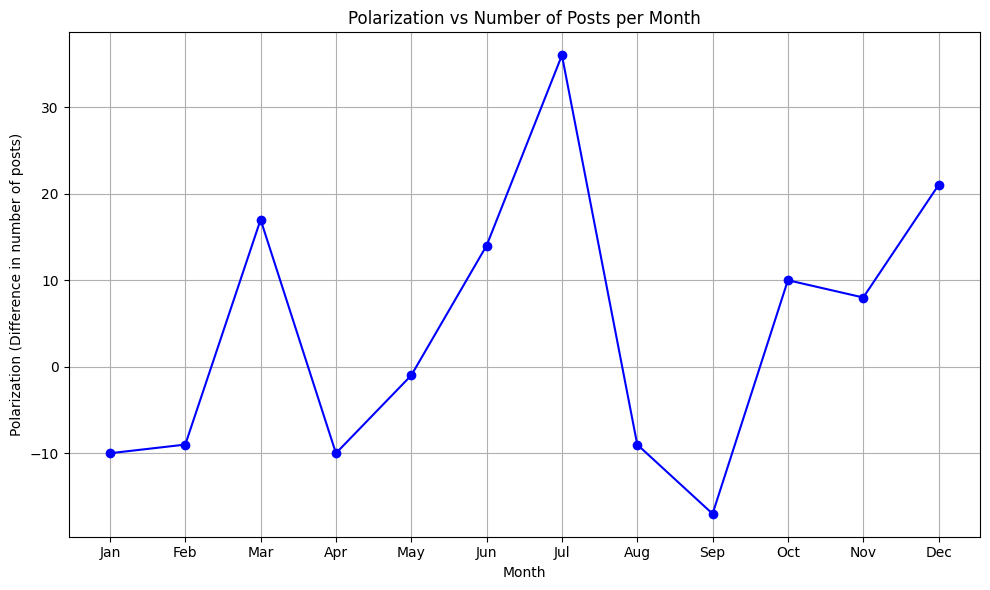

In [14]:
sentiment_ranges = [(-1.0, -0.33), (-0.33, 0.33), (0.33, 1.0)]

# Initialize a dictionary to store counts for each sentiment range
sentiment_counts = {range_: pd.Series(
    0, index=range(1, 13)) for range_ in sentiment_ranges}

# Count the number of posts for each sentiment range and each month
for sentiment_range in sentiment_ranges:
    sentiment_start, sentiment_end = sentiment_range
    # Filter DataFrame based on sentiment range
    filtered_df = sampled_df[(sampled_df['sentiment'] >= sentiment_start) & (
        sampled_df['sentiment'] < sentiment_end)]
    # Extract month from 'created_utc'
    filtered_df['month'] = filtered_df['created_utc'].dt.month
    # Group by month and count the number of posts
    posts_per_month = filtered_df.groupby('month').size()
    # Update sentiment counts dictionary
    sentiment_counts[sentiment_range] = posts_per_month

# Convert the sentiment counts dictionary to DataFrame
sentiment_counts_df = pd.DataFrame(sentiment_counts)

# Fill missing months with zero counts
sentiment_counts_df.fillna(0, inplace=True)

# Calculate polarization
polarization = sentiment_counts_df[(-1.0, -0.33)] - \
    sentiment_counts_df[(0.33, 1.0)]

# Calculate total number of posts per month
total_posts_per_month = sentiment_counts_df.sum(axis=1)

# Initialize a figure
plt.figure(figsize=(10, 6))

# Plot polarization against total number of posts per month
plt.plot(total_posts_per_month.index, polarization, marker='o', color='blue')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Polarization (Difference in number of posts)')
plt.title('Polarization vs Number of Posts per Month')

# Show plot
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr',
           'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/h1/p6c3s9rd35j1hz7z1fbdwf8r0000gn/T/ipykernel_2806/1347625251.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['created_utc'].dt.month
/var/folders/h1/p6c3s9rd35j1hz7z1fbdwf8r0000gn/T/ipykernel_2806/1347625251.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['created_utc'].dt.month
/var/folders/h1/p6c3s9rd35j1hz7z1fbdwf8r0000gn/T/ipykernel_2806/1347625251.py:14: SettingWithCopyWarning: 
A value is trying to be set on 

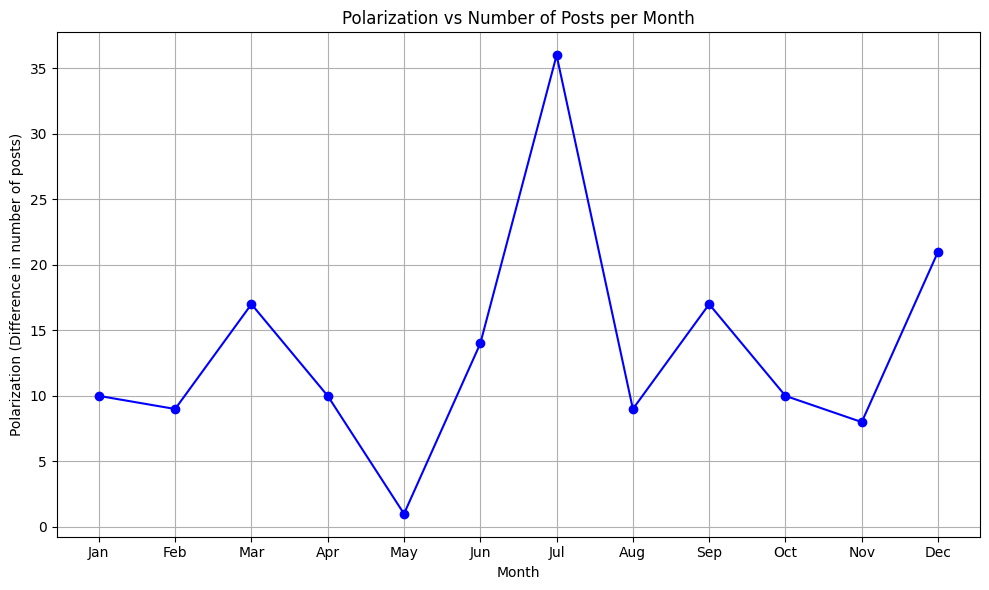

In [15]:
sentiment_ranges = [(-1.0, -0.33), (-0.33, 0.33), (0.33, 1.0)]

# Initialize a dictionary to store counts for each sentiment range
sentiment_counts = {range_: pd.Series(
    0, index=range(1, 13)) for range_ in sentiment_ranges}

# Count the number of posts for each sentiment range and each month
for sentiment_range in sentiment_ranges:
    sentiment_start, sentiment_end = sentiment_range
    # Filter DataFrame based on sentiment range
    filtered_df = sampled_df[(sampled_df['sentiment'] >= sentiment_start) & (
        sampled_df['sentiment'] < sentiment_end)]
    # Extract month from 'created_utc'
    filtered_df['month'] = filtered_df['created_utc'].dt.month
    # Group by month and count the number of posts
    posts_per_month = filtered_df.groupby('month').size()
    # Update sentiment counts dictionary
    sentiment_counts[sentiment_range] = posts_per_month

# Convert the sentiment counts dictionary to DataFrame
sentiment_counts_df = pd.DataFrame(sentiment_counts)

# Fill missing months with zero counts
sentiment_counts_df.fillna(0, inplace=True)

# Calculate polarization for each month
polarization_per_month = (
    sentiment_counts_df[(-1.0, -0.33)] - sentiment_counts_df[(0.33, 1.0)]).abs()

# Calculate total number of posts per month
total_posts_per_month = sentiment_counts_df.sum(axis=1)

# Initialize a figure
plt.figure(figsize=(10, 6))

# Plot polarization against total number of posts per month
plt.plot(total_posts_per_month.index,
         polarization_per_month, marker='o', color='blue')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Polarization (Difference in number of posts)')
plt.title('Polarization vs Number of Posts per Month')

# Show plot
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr',
           'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

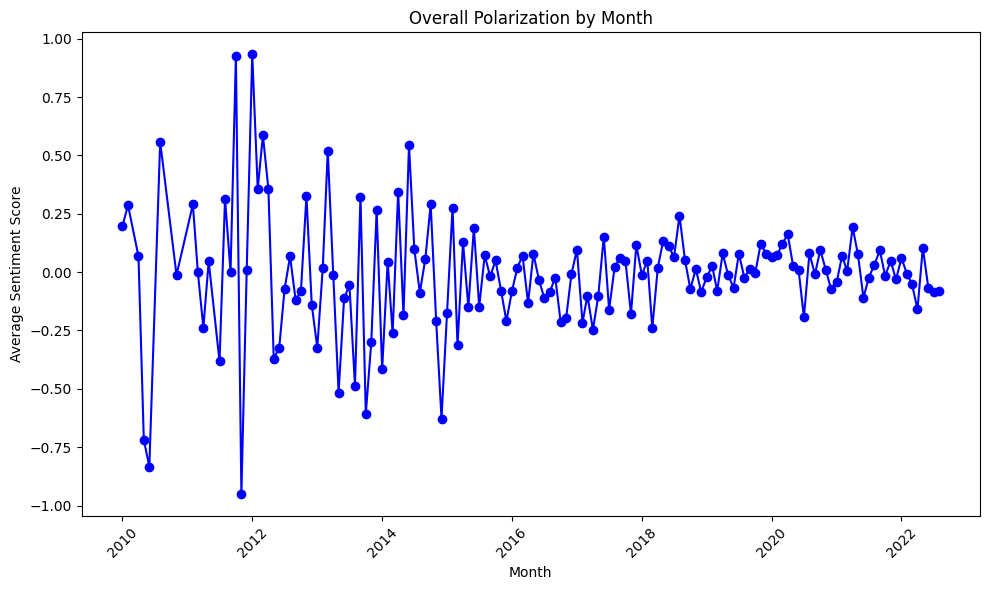

In [16]:
average_sentiment_per_month = sampled_df.groupby('month')['sentiment'].mean()

# Initialize a figure
plt.figure(figsize=(10, 6))

# Plot the overall polarization
plt.plot(average_sentiment_per_month.index.to_timestamp(),
         average_sentiment_per_month, marker='o', color='blue')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.title('Overall Polarization by Month')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
print(sampled_df.columns.tolist())

['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw', 'created_utc', 'permalink', 'body', 'sentiment', 'score', 'month']


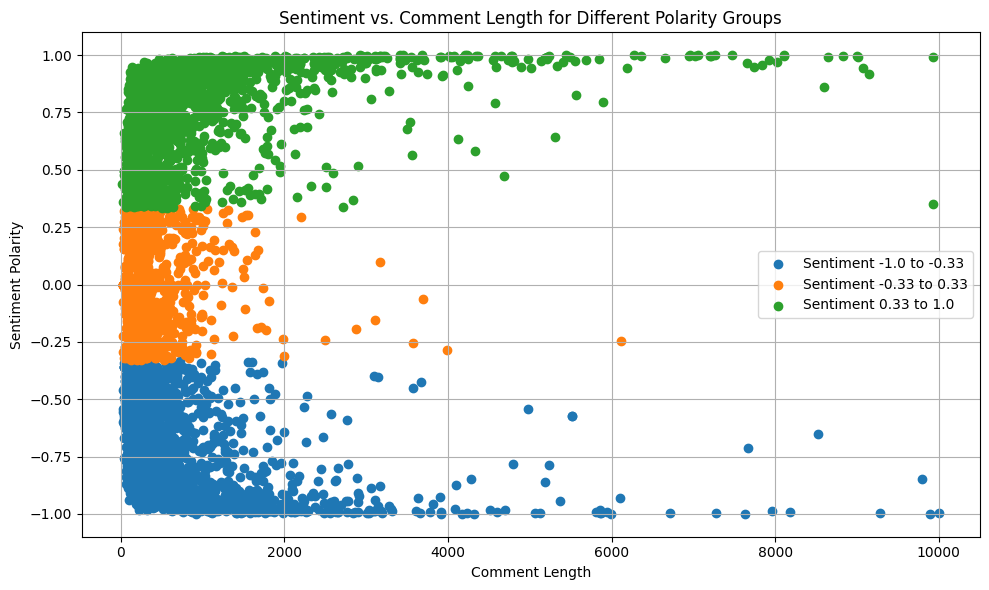

In [19]:
sentiment_ranges = [(-1.0, -0.33), (-0.33, 0.33), (0.33, 1.0)]

# Initialize lists to store sentiment polarities and comment lengths for each polarity group
sentiment_polarities = [[] for _ in range(len(sentiment_ranges))]
comment_lengths = [[] for _ in range(len(sentiment_ranges))]

# Calculate sentiment polarity for each comment
for i, sentiment_range in enumerate(sentiment_ranges):
    sentiment_start, sentiment_end = sentiment_range
    # Filter DataFrame based on sentiment range
    filtered_df = sampled_df[(sampled_df['sentiment'] >= sentiment_start) & (
        sampled_df['sentiment'] < sentiment_end)]
    # Calculate sentiment polarity for each comment
    sentiment_polarities[i] = filtered_df['sentiment']
    # Calculate comment length for each comment
    comment_lengths[i] = filtered_df['body'].str.len()

# Initialize a figure
plt.figure(figsize=(10, 6))

# Plot sentiment vs. comment length for each polarity group
for i, sentiment_range in enumerate(sentiment_ranges):
    plt.scatter(comment_lengths[i], sentiment_polarities[i],
                label=f'Sentiment {sentiment_range[0]} to {sentiment_range[1]}')

# Set labels and title
plt.xlabel('Comment Length')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment vs. Comment Length for Different Polarity Groups')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Encode month as categorical variables
sampled_df = pd.get_dummies(sampled_df, columns=['month'])

# Define independent variables (features)
X = sampled_df.drop(columns=['sentiment', 'score'])

# Add constant to independent variables (for intercept)
X = sm.add_constant(X)

# Define dependent variable (target)
y = sampled_df['sentiment']

# Perform linear regression
model = sm.OLS(y, X)
results = model.fit()

# Print regression summary
print(results.summary())